#### Algorithmic Trading COMP0051 2023/24 Coursework 1

## Time series [10 Points]

#### 1.  Download two ETF time series using an API. The length of the time series T, with T=300 and a daily resolution.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Define the tickers and the time period
# SPY: ETF that tracks the S&P 500, QQQ: ETF that tracks the NASDAQ-100
tickers = ['SPY', 'QQQ'] 

# Download historical data
data = yf.download(tickers, period="300d")['Close']

print(len(data))


[*********************100%%**********************]  2 of 2 completed

300


#### 2.  Plot the price time series

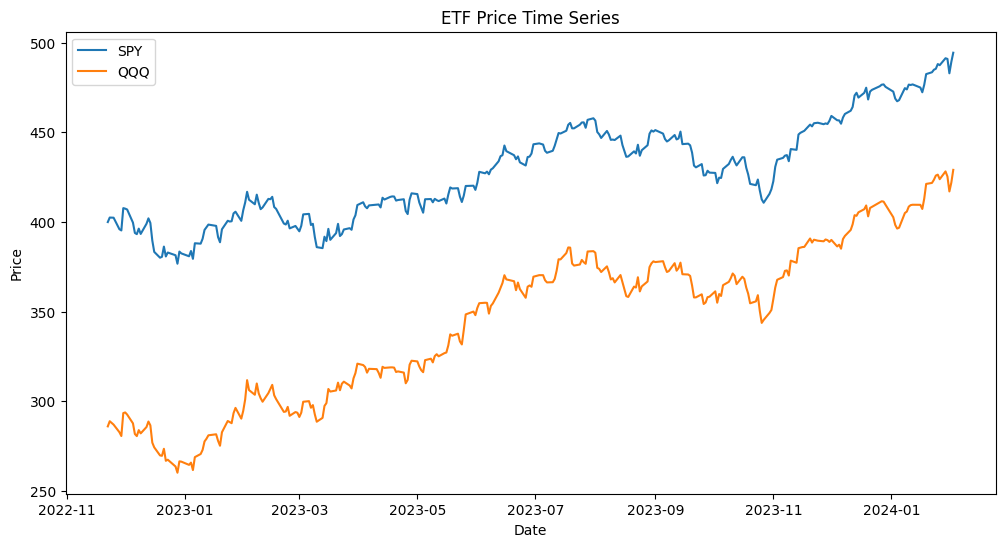

In [2]:

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SPY'], label='SPY')
plt.plot(data.index, data['QQQ'], label='QQQ')
plt.title('ETF Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Moving averages [20 Points]

#### 3.  Define mathematically the moving average of the price time series with an arbitrary time-window τ

The moving average of a price time series with a time-window τ is mathematically defined as follows:

- Let `P(t)` represent the price at time `t`.
- The moving average `MA(t)` at time `t` for a time-window `τ` is given by the formula:

$$
MA(t) = \frac{1}{\tau} \sum_{n=0}^{\tau-1} P(t-n)
$$


#### 4.  Compute three moving averages of the price time series, with time-windows τ=5,20,60

In [3]:
# Calculate moving averages for specified time windows
tau_values = [5, 20, 60]
for tau in tau_values:
    for ticker in tickers:
        data[f'{ticker}_MA{tau}'] = data[ticker].rolling(window=tau).mean()

# Display the last few rows of the dataframe with the moving averages
print(data.tail())

Ticker             QQQ         SPY     SPY_MA5     QQQ_MA5    SPY_MA20  \
Date                                                                     
2024-01-29  428.149994  491.269989  487.391998  425.523999  477.828500   
2024-01-30  425.299988  490.890015  488.598004  425.887994  478.607501   
2024-01-31  416.970001  482.880005  488.096002  424.115997  479.119002   
2024-02-01  421.880005  489.200012  488.330005  423.221997  480.139502   
2024-02-02  429.010010  494.350006  489.718005  424.262000  481.493002   

Ticker        QQQ_MA20    SPY_MA60    QQQ_MA60  
Date                                            
2024-01-29  412.091498  463.011167  397.286499  
2024-01-30  412.880498  464.148334  398.425499  
2024-01-31  413.599498  465.017001  399.317666  
2024-02-01  414.776999  465.925501  400.220499  
2024-02-02  416.413499  466.903168  401.217166  


#### 5.  Plot the moving averages against the price time series

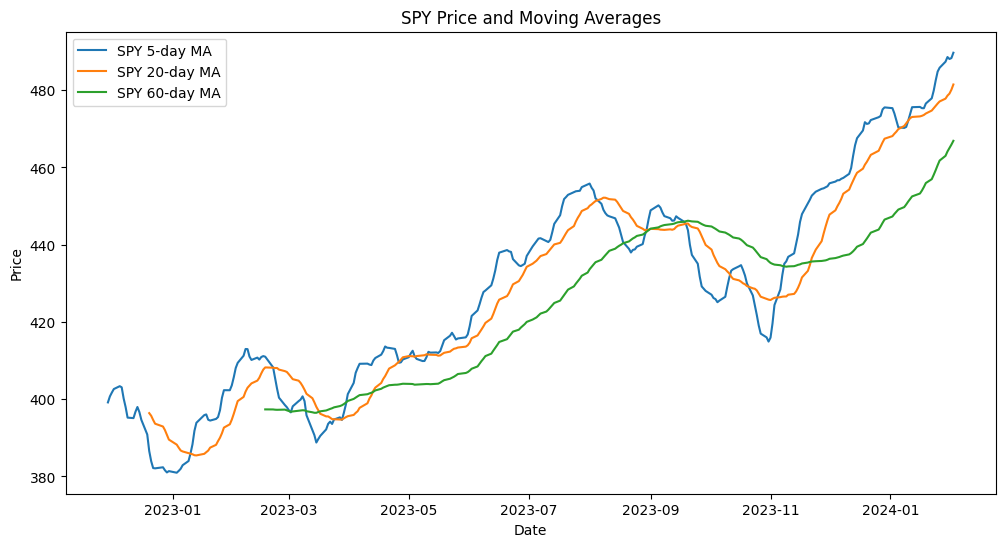

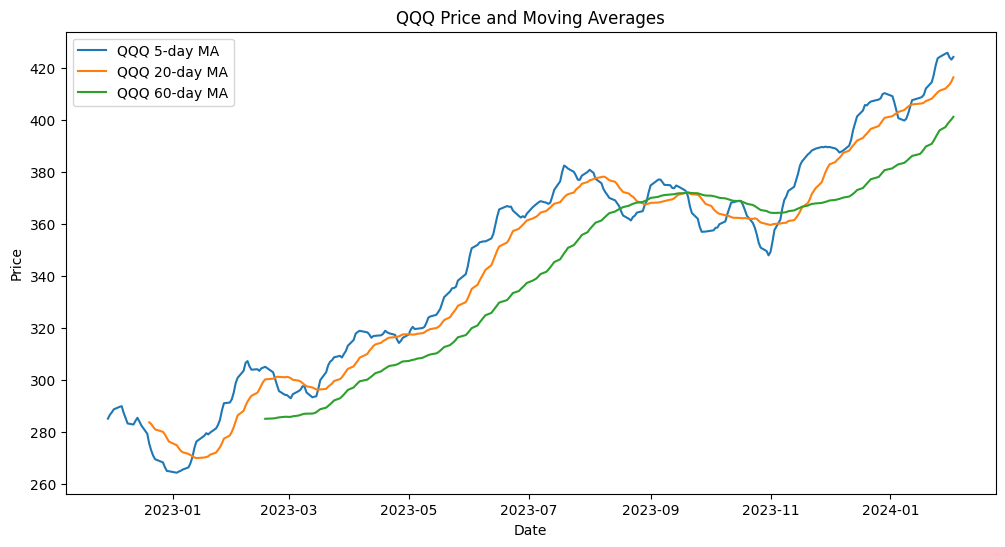

In [4]:
# Plot the moving averages against the price time series for each ticker
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    # plt.plot(data.index, data[ticker], label=f'{ticker} Price', color='blue')
    for tau in tau_values:
        plt.plot(data.index, data[f'{ticker}_MA{tau}'], label=f'{ticker} {tau}-day MA')

    plt.title(f'{ticker} Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

#### 6.  Compute the linear and log-return of the price time series

In [5]:
import numpy as np

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Compute the linear returns
linear_returns = data.pct_change()

# Compute the log-returns
log_returns = np.log(data / data.shift(1))

# Display the last few rows of linear and log-returns
print("Linear Returns:\n", linear_returns.tail())
print("\nLog Returns:\n", log_returns.tail())

[*********************100%%**********************]  2 of 2 completed

Linear Returns:
 Ticker           QQQ       SPY
Date                          
2024-01-29  0.010240  0.007919
2024-01-30 -0.006657 -0.000773
2024-01-31 -0.019586 -0.016317
2024-02-01  0.011775  0.013088
2024-02-02  0.016901  0.010527

Log Returns:
 Ticker           QQQ       SPY
Date                          
2024-01-29  0.010188  0.007888
2024-01-30 -0.006679 -0.000774
2024-01-31 -0.019780 -0.016452
2024-02-01  0.011707  0.013003
2024-02-02  0.016759  0.010472


#### 7.  Plot the linear return against the log-return time series

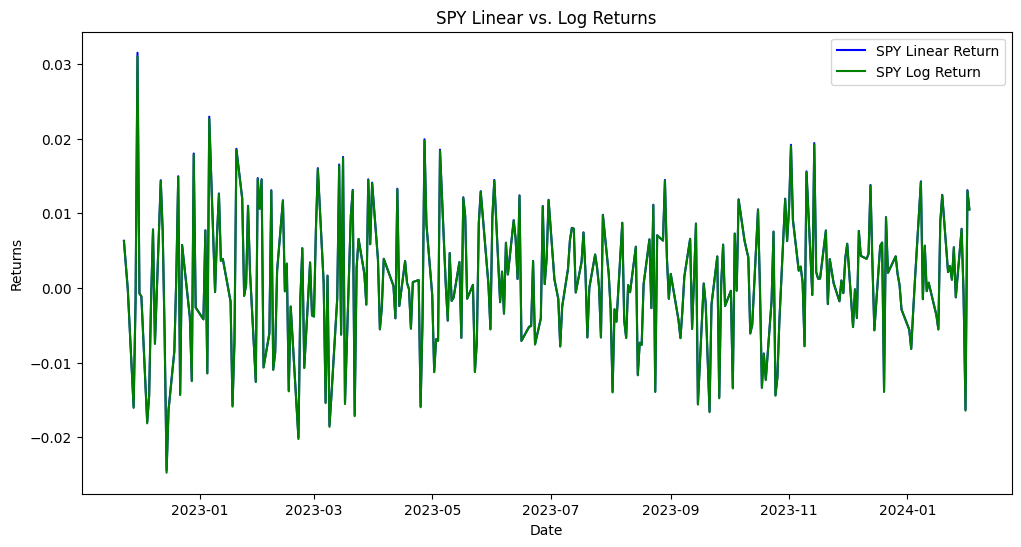

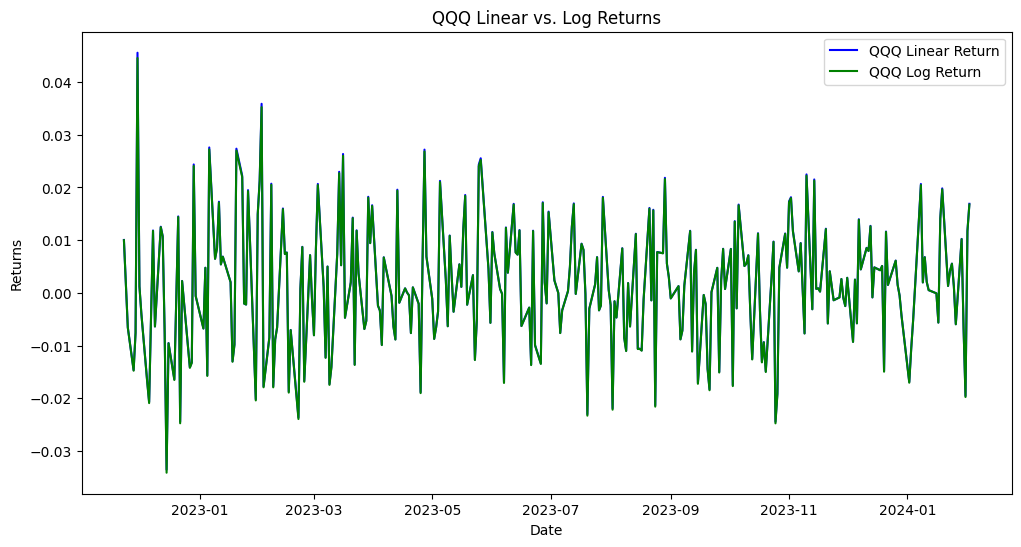

In [6]:
# Plot the linear return against the log-return time series for each ticker
for ticker in tickers:
    plt.figure(figsize=(12, 6))

    # Plot both linear and log returns on the same graph
    plt.plot(linear_returns.index, linear_returns[ticker], label=f'{ticker} Linear Return', color='blue')
    plt.plot(log_returns.index, log_returns[ticker], label=f'{ticker} Log Return', color='green')

    plt.title(f'{ticker} Linear vs. Log Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()

    plt.show()

## cumulative maybe?

[*********************100%%**********************]  2 of 2 completed


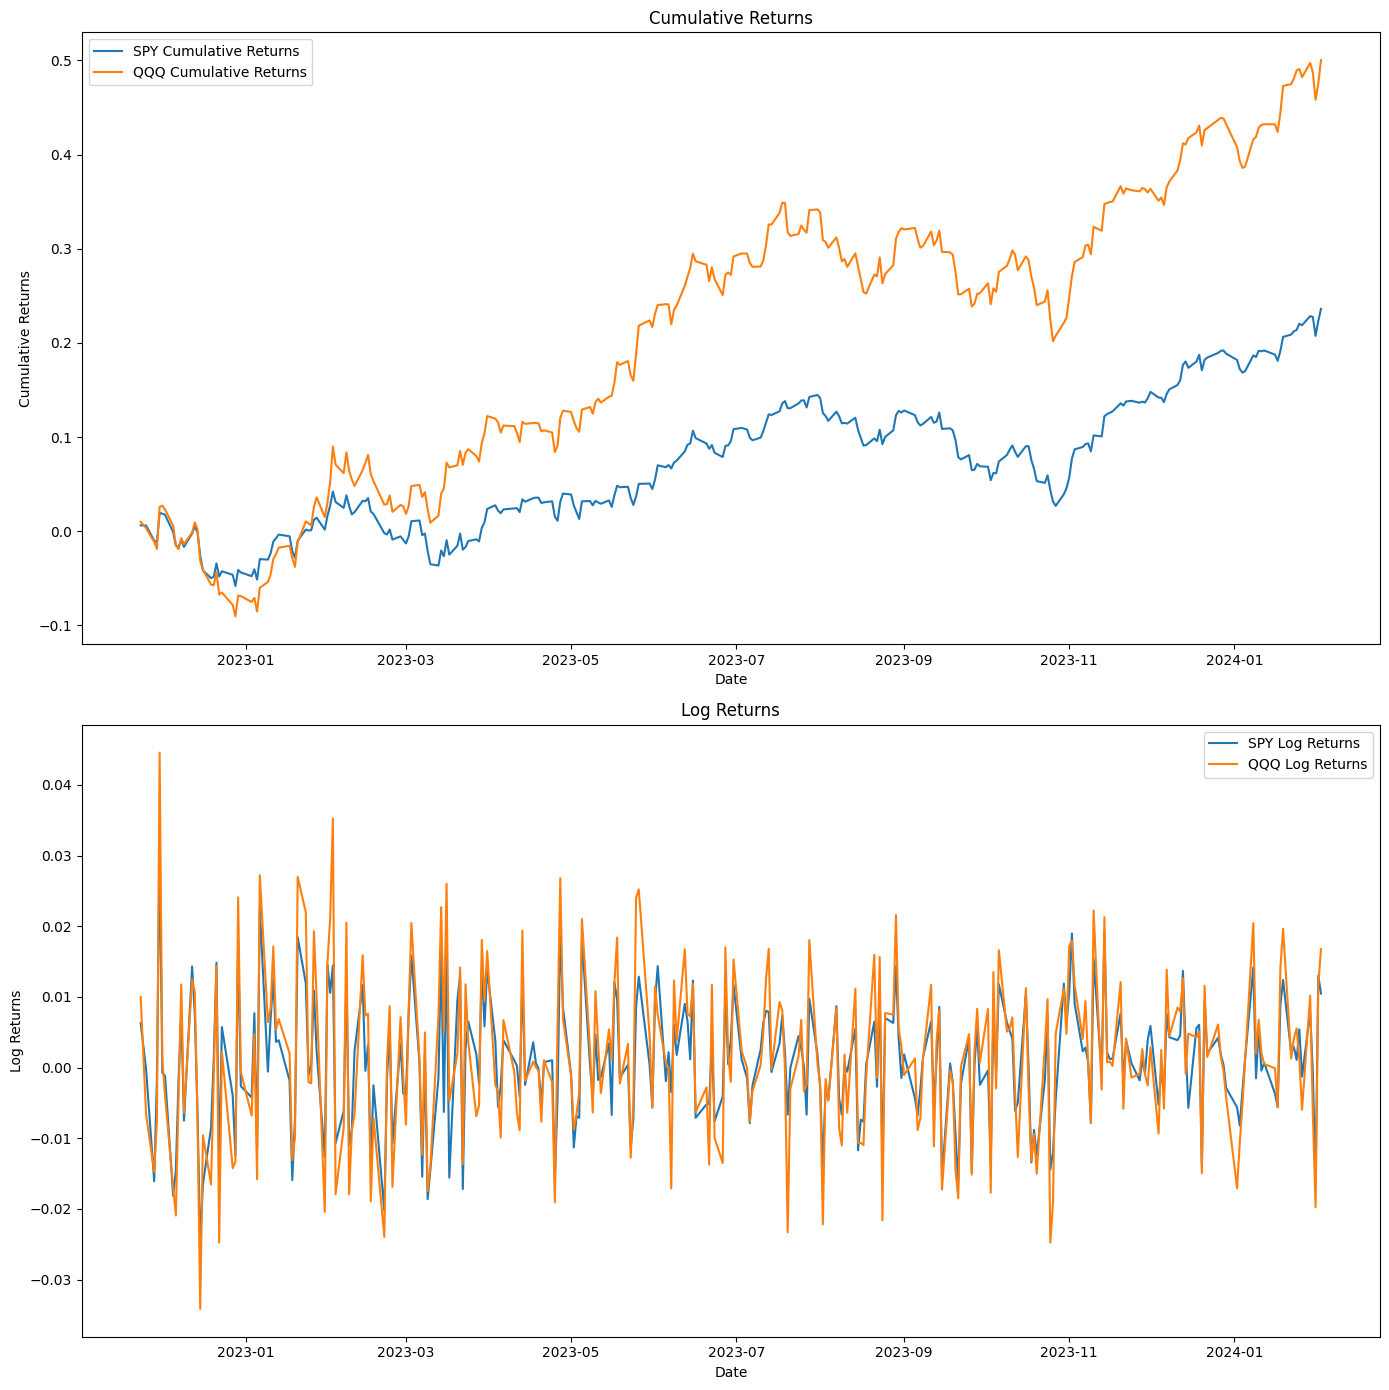

In [7]:
# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Compute the cumulative returns
cumulative_returns = (1 + data.pct_change()).cumprod() - 1

# Compute the log-returns
log_returns = np.log(data / data.shift(1))

# Create a subplot for cumulative returns and log returns
fig, axs = plt.subplots(2, 1, figsize=(14, 14))

# Plot the cumulative returns
for ticker in tickers:
    axs[0].plot(cumulative_returns.index, cumulative_returns[ticker], label=f'{ticker} Cumulative Returns')

axs[0].set_title('Cumulative Returns')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Cumulative Returns')
axs[0].legend()

# Plot the log returns
for ticker in tickers:
    axs[1].plot(log_returns.index, log_returns[ticker], label=f'{ticker} Log Returns')

axs[1].set_title('Log Returns')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log Returns')
axs[1].legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  2 of 2 completed

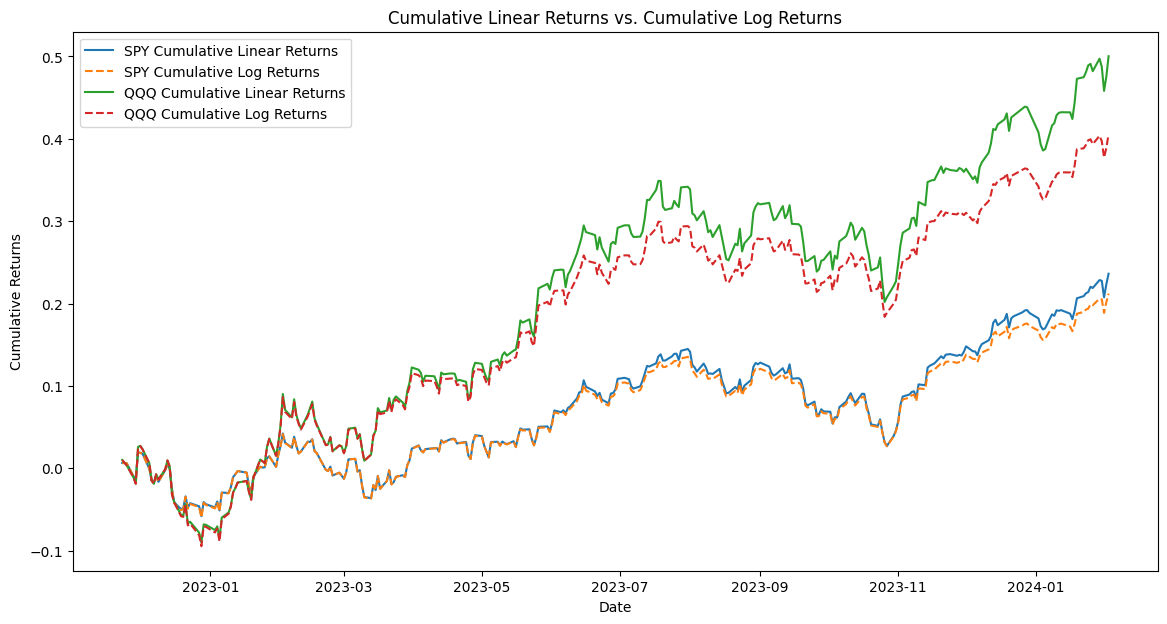

In [8]:
# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Compute the linear returns and cumulative linear returns
cumulative_linear_returns = (1 + data.pct_change()).cumprod() - 1

# Compute the log-returns and cumulative log returns
log_returns = np.log(data / data.shift(1))
cumulative_log_returns = log_returns.cumsum()

# Plot both cumulative linear and cumulative log returns on the same graph
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(cumulative_linear_returns.index, cumulative_linear_returns[ticker], label=f'{ticker} Cumulative Linear Returns')
    plt.plot(cumulative_log_returns.index, cumulative_log_returns[ticker], label=f'{ticker} Cumulative Log Returns', linestyle='--')

plt.title('Cumulative Linear Returns vs. Cumulative Log Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


## Time Series Analysis [20 Points]

#### 8.  Define the auto-correlation function (for a stationary time-series)


The auto-correlation function for a stationary time series is a key concept in time series analysis, used for identifying patterns and potential predictability. It measures how much the time series correlates with a delayed version of itself. For a stationary time series $X_t$, the auto-correlation function (ACF) at lag $k$ is defined as follows:

- Let $ \mu $ be the mean of the time series $X_t$ and $ \sigma^2 $ be its variance.
- The auto-correlation function $ \rho(k) $ at lag $k$ is given by the formula:

  $$ \rho(k) = \frac{E[(X_t - \mu)(X_{t-k} - \mu)]}{\sigma^2} $$

  where:
  - $ E $ is the expectation operator.
  - $ X_t $ is the value of the time series at time $ t $.
  - $ X_{t-k} $ is the value of the time series at time $ t-k $.
  - $ \mu $ is the mean of the time series.
  - $ \sigma^2 $ is the variance of the time series.
  - $ k $ is the lag, a non-negative integer.

In simpler terms, $ \rho(k) $ measures the degree of linear relationship between the values of the time series separated by a lag of $ k $ periods. The ACF value lies between -1 and 1, where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation, and 0 indicates no correlation.


#### 9.  Compute the auto-correlation functions (ACF) of the price time series

#### 10.  Plot the price ACFs

[*********************100%%**********************]  2 of 2 completed


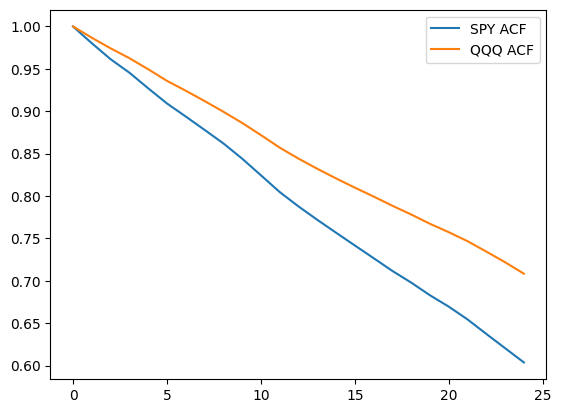

In [9]:
import statsmodels.api as sm

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Extract the 'Close' columns for SPY and QQQ
close_spy = data['SPY']
close_qqq = data['QQQ']

# Compute and plot the ACF for SPY and QQQ
acf_spy = sm.tsa.stattools.acf(close_spy)
acf_qqq = sm.tsa.stattools.acf(close_qqq)

plt.plot(acf_spy, label='SPY ACF')
plt.plot(acf_qqq, label='QQQ ACF')
plt.legend()
plt.show()


#### 11.  Compute the partial auto-correlation functions (PACF) of the price time series

#### 12.  Plot the price PACFs

[                       0%%                      ]

[*********************100%%**********************]  2 of 2 completed


<Figure size 1000x600 with 0 Axes>

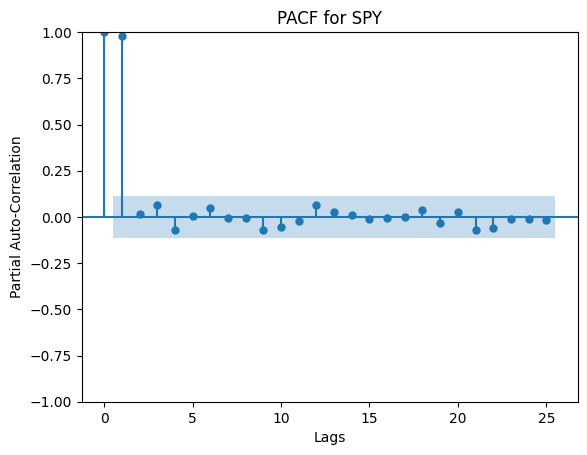

<Figure size 1000x600 with 0 Axes>

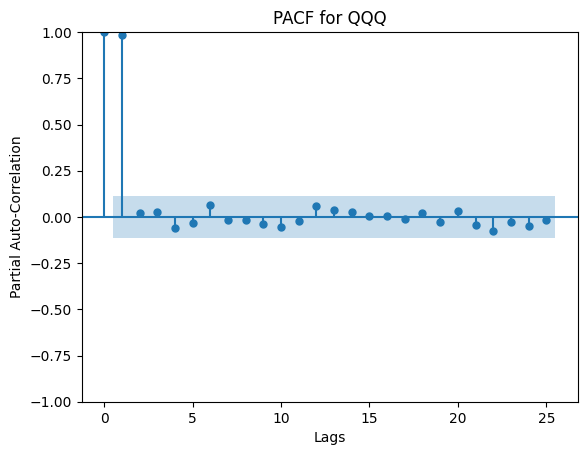

In [10]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Compute and plot PACF for each ticker
for ticker in tickers:
    # Drop NaN values from the time series
    ts = data[ticker].dropna()
    
    
    # Compute PACF
    pacf_values = pacf(ts)
    
    # Plot PACF
    plt.figure(figsize=(10, 6))
    plot_pacf(ts, title=f'PACF for {ticker}')
    plt.xlabel('Lags')
    plt.ylabel('Partial Auto-Correlation')
    plt.show()


#### 13.  Compute the auto-correlation function (ACF) of the return time series

#### 14.  Plot the return ACFs

[                       0%%                      ]

[*********************100%%**********************]  2 of 2 completed


<Figure size 1000x600 with 0 Axes>

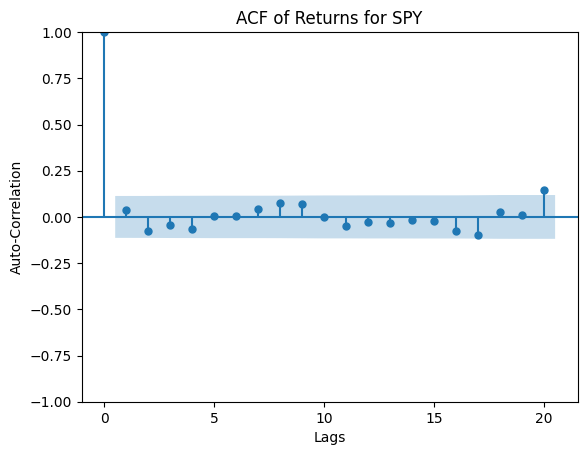

<Figure size 1000x600 with 0 Axes>

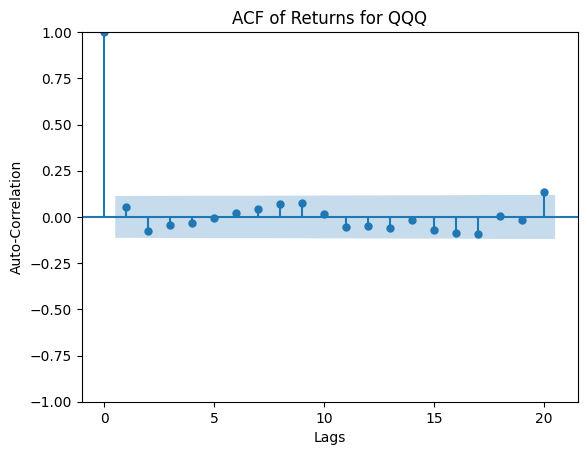

In [11]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Compute and plot ACF for the returns of each ticker
for ticker in tickers:
    # Compute returns and drop NaN values
    returns = data[ticker].pct_change().dropna()
    
    # Plot ACF for returns
    plt.figure(figsize=(10, 6))
    plot_acf(returns, title=f'ACF of Returns for {ticker}', lags=20)
    plt.xlabel('Lags')
    plt.ylabel('Auto-Correlation')
    plt.show()


#### 15.  Compute the partial auto-correlation functions (PACF) of the return time series

#### 16.  Plot the return PACFs

[*********************100%%**********************]  2 of 2 completed

<Figure size 1000x600 with 0 Axes>

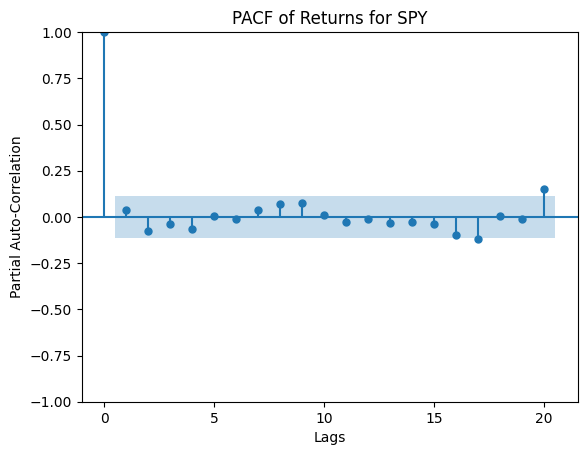

<Figure size 1000x600 with 0 Axes>

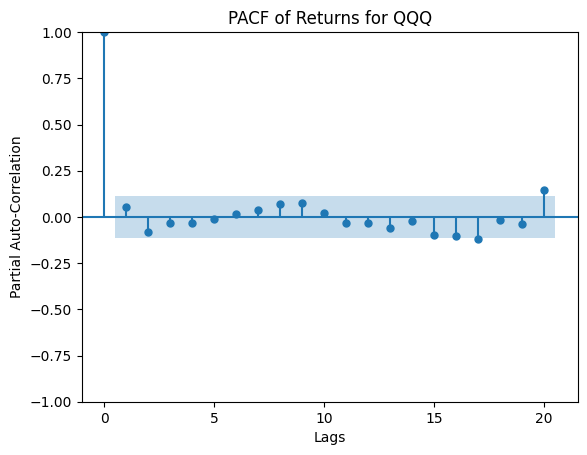

In [12]:
# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Compute and plot PACF for the returns of each ticker
for ticker in tickers:
    # Compute returns and drop NaN values
    returns = data[ticker].pct_change().dropna()
    
    # Compute PACF for returns
    pacf_values = pacf(returns, nlags=20)
    
    # Plot PACF for returns
    plt.figure(figsize=(10, 6))
    plot_pacf(returns, lags=20, title=f'PACF of Returns for {ticker}')
    plt.xlabel('Lags')
    plt.ylabel('Partial Auto-Correlation')
    plt.show()


## Gaussianity and Stationarity test [20 Points]  

#### 17.  Introduce mathematically a Gaussianity test

A Gaussianity test, also known as a normality test, is used to determine if a dataset comes from a normally distributed population. One common test for Gaussianity is the **Shapiro-Wilk test**. The Shapiro-Wilk test calculates a statistic, $W$, which can be used to assess the normality of a distribution. The test hypothesis for the Shapiro-Wilk test is as follows:

- Null hypothesis ($H_0$): The data is drawn from a normal distribution.
- Alternative hypothesis ($H_1$): The data is not drawn from a normal distribution.

The test statistic $W$ is defined as:

$$
W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

where:
- $n$ is the sample size,
- $x_{(i)}$ are the ordered sample values ($x_{(1)} \leq x_{(2)} \leq \ldots \leq x_{(n)}$),
- $a_i$ are constants generated from the covariances, variances, and means of the order statistics of a normally distributed sample,
- $x_i$ are the sample values,
- $\bar{x}$ is the mean of the sample values.

The value of $W$ ranges from 0 to 1, where a value close to 1 indicates that the data is likely normally distributed. The significance level (usually denoted as alpha, $\alpha$) is chosen, and the p-value from the test is compared against this $\alpha$ to decide whether to reject the null hypothesis.


#### 18.  Perform a Gaussianity test of the return time series

In [18]:
from scipy.stats import shapiro

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Perform Shapiro-Wilk Test for each ticker
for ticker in tickers:
    # Compute returns using the specified formula
    returns = data[ticker][:-1].values / data[ticker][1:].values - 1
    
    # Perform the normality test
    stat, p = shapiro(returns)
    print(f'{ticker} - Statistics={stat:.3f}, p={p:.3f}')
    
    # Interpret
    alpha = 0.05
    if p > alpha:
        print(f'{ticker} returns look Gaussian (fail to reject H0)')
    else:
        print(f'{ticker} returns do not look Gaussian (reject H0)')


[*********************100%%**********************]  2 of 2 completed

SPY - Statistics=0.994, p=0.265
SPY returns look Gaussian (fail to reject H0)
QQQ - Statistics=0.996, p=0.676
QQQ returns look Gaussian (fail to reject H0)


#### 19.  Introduce mathematically a stationarity test

A common stationarity test used in time series analysis is the **Augmented Dickey-Fuller (ADF) test**. The ADF test is utilized to determine whether a time series is stationary, meaning its statistical properties do not vary over time. The test specifically examines the null hypothesis that a unit root is present in an autoregressive model of the time series, implying non-stationarity.

The ADF test statistic is derived from the following regression model:

$$\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \delta_2 \Delta y_{t-2} + ... + \delta_p \Delta y_{t-p} + \epsilon_t$$

where:
- $y_t$ is the time series at time $t$,
- $\Delta y_t = y_t - y_{t-1}$ is the first difference of the time series,
- $\alpha$ is a constant term,
- $\beta t$ is the coefficient on a time trend (if included),
- $\gamma$ is the coefficient on $y_{t-1}$ (the lagged level of the series),
- $\delta_1, \delta_2, ..., \delta_p$ are the coefficients on the first $p$ differences of the series,
- $\epsilon_t$ is the error term.

The null hypothesis (H0) of the test is that $\gamma = 0$, indicating the presence of a unit root and thus non-stationarity. The alternative hypothesis (H1) depends on the specific form of the test but generally suggests that the time series is stationary.

The ADF test statistic is calculated as:

$$\tau = (\hat{\gamma} - 0) / SE(\hat{\gamma})$$

where $\hat{\gamma}$ is the estimated value of $\gamma$ from the regression, and $SE(\hat{\gamma})$ is the standard error of $\hat{\gamma}$. This statistic is then compared to critical values for the ADF distribution. If $\tau$ is less than the critical value (more negative), we reject H0, indicating evidence against the presence of a unit root and in favor of stationarity.


#### 20.  Perform a stationarity test of the return time series

In [19]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Perform ADF Test for each ticker
for ticker in tickers:
    # Compute returns and drop NaN values
    returns = data[ticker].pct_change().dropna()
    
    # Perform ADF test
    result = adfuller(returns)
    print(f'{ticker} - ADF Statistic: {result[0]:.3f}')
    print(f'{ticker} - p-value: {result[1]:.3f}')
    
    # Interpret
    alpha = 0.05
    if result[1] > alpha:
        print(f'{ticker} returns do not appear to be stationary (fail to reject H0)')
    else:
        print(f'{ticker} returns appear to be stationary (reject H0)')


[*********************100%%**********************]  2 of 2 completed

SPY - ADF Statistic: -16.544
SPY - p-value: 0.000
SPY returns appear to be stationary (reject H0)
QQQ - ADF Statistic: -16.251
QQQ - p-value: 0.000
QQQ returns appear to be stationary (reject H0)


## Conintegration [30 Points]

#### 21.  Define mathematically a cointegration test

Cointegration tests are utilized to determine if a linear combination of two or more non-stationary time series is stationary. This concept is essential in time series analysis, particularly in econometrics, for identifying when separate series maintain a long-term equilibrium relationship. One widely used cointegration test is the **Engle-Granger two-step method**.

#### Engle-Granger Two-Step Method:

**Step 1: Regression**

First, one non-stationary time series is regressed on another to obtain the residual series:

$$ Y_t = \alpha + \beta X_t + \epsilon_t $$

where:
- $Y_t$ and $X_t$ are the non-stationary time series,
- $\alpha$ and $\beta$ are coefficients,
- $\epsilon_t$ is the residual of the regression at time $t$.

**Step 2: Stationarity Test of Residuals**

Then, the residuals ($\epsilon_t$) are tested for stationarity using a unit root test like the Augmented Dickey-Fuller (ADF) test. If the residuals are found to be stationary, then $Y_t$ and $X_t$ are considered to be cointegrated.

#### Interpretation:

- **Null Hypothesis (H0)**: There is no cointegration, implying the residuals are non-stationary.
- **Alternative Hypothesis (H1)**: There is cointegration, implying the residuals are stationary.

If the test statistic is less (more negative) than the critical value, or if the p-value is less than a chosen significance level (commonly 0.05), H0 is rejected, indicating that the series are cointegrated.


#### 22.  Perform a cointegration test of the two ETF price time series

In [20]:
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Download historical data for the ETFs
tickers = ['SPY', 'QQQ']
data = yf.download(tickers, start="2020-01-01", end="2021-01-01")['Close']

# Step 1: Regression to find the residuals
y = data['SPY']
X = sm.add_constant(data['QQQ'])  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
residuals = model.resid

# Step 2: Test residuals for stationarity with Augmented Dickey-Fuller test
adf_result = adfuller(residuals)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# Interpretation
alpha = 0.05
if adf_result[1] < alpha:
    print("The residuals are stationary. The time series are cointegrated (reject H0).")
else:
    print("The residuals are not stationary. The time series are not cointegrated (fail to reject H0).")


[*********************100%%**********************]  2 of 2 completed

ADF Statistic: -2.7812977835953916
p-value: 0.06099530561735543
Critical Values:
   1%, -3.4575505077947746
Critical Values:
   5%, -2.8735087323013526
Critical Values:
   10%, -2.573148434859185
The residuals are not stationary. The time series are not cointegrated (fail to reject H0).


#### 23.  Perform a cointegration test of the two ETF return time series

In [21]:
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Download historical data for the ETFs
tickers = ['SPY', 'QQQ']
data = yf.download(tickers, start="2020-01-01", end="2021-01-01")['Close']

# Calculate daily returns for each ETF
returns = data.pct_change().dropna()

# Perform regression on the returns
y = returns['SPY']
X = sm.add_constant(returns['QQQ'])  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
residuals = model.resid

# Test residuals for stationarity with Augmented Dickey-Fuller test
adf_result = adfuller(residuals)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print(f'Critical Values: {key}, {value}')

# Interpretation
alpha = 0.05
if adf_result[1] < alpha:
    print("The residuals are stationary. The return time series are cointegrated (reject H0).")
else:
    print("The residuals are not stationary. The return time series are not cointegrated (fail to reject H0).")


[*********************100%%**********************]  2 of 2 completed

ADF Statistic: -10.596101756929857
p-value: 6.343892895098487e-19
Critical Values: 1%, -3.4568881317725864
Critical Values: 5%, -2.8732185133016057
Critical Values: 10%, -2.5729936189738876
The residuals are stationary. The return time series are cointegrated (reject H0).
